In [108]:
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd

conn = sqlite3.connect("../data/conditions2.db")

query = """
SELECT age, gender, patient
FROM (
    SELECT c.patient, p.gender, DATE(p.birthdate) as dob, min(DATE(c.start)) as start, (cast(strftime('%Y.%m%d', min(DATE(c.start))) - strftime('%Y.%m%d', DATE(p.birthdate)) as int) / 2) * 2 as age
    FROM conditions c
    JOIN patients p on c.patient = p.id
    WHERE c.description = 'Ischemic heart disease (disorder)'
    GROUP BY c.patient
    ORDER BY age
 ) h
WHERE age >= 20;
"""


df = pd.read_sql(query, conn)
df

,age,gender,patient
0,40,F,10ea5f77-7485-f458-7be6-45f49b2c6b56
1,40,M,17a21868-d0f7-f8a1-db99-3484708554a5
2,40,M,1c6a67d4-7599-e09c-8cdd-69c33dba155b
3,40,M,1fb783eb-172e-b11a-60c3-5f9a442b1cf6
4,40,M,20e3ff9c-e6ee-52a0-bcac-2515b4754d2e
...,...,...,...
2586,78,F,ff369431-cfdf-c1a7-9400-e338691397df
2587,80,F,21609b93-f783-be55-a68d-800432816740
2588,80,M,9dda9c5b-359b-5da6-9d55-c339a53075ca
2589,80,F,c8618bc2-5129-56ef-f7c7-9c393c2f9a05


In [109]:
womenMeanDf = df.where(df.gender == "F").dropna().mean()
menMeanDf = df.where(df.gender == "M").dropna().mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_20580\3459853752.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  womenMeanDf = df.where(df.gender == "F").dropna().mean()
C:\Users\krist\AppData\Local\Temp\ipykernel_20580\3459853752.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  menMeanDf = df.where(df.gender == "M").dropna().mean()


MALES Below


In [110]:
import numpy.random as np
howManyPeopleQuery = """
SELECT COUNT(*) as count
FROM (
    SELECT c.patient, p.gender, DATE(p.birthdate) as dob, min(DATE(c.start)) as start, (cast(strftime('%Y.%m%d', min(DATE(c.start))) - strftime('%Y.%m%d', DATE(p.birthdate)) as int) / 2) * 2 as age
    FROM conditions c
    JOIN patients p on c.patient = p.id
    WHERE c.description = 'Ischemic heart disease (disorder)'
    GROUP BY c.patient
    ORDER BY age
 ) h
WHERE age >= 20
ORDER by gender
;
"""

maxMaleQuery = """
SELECT MAX(age)
FROM (
    SELECT c.patient, p.gender, DATE(p.birthdate) as dob, min(DATE(c.start)) as start, (cast(strftime('%Y.%m%d', min(DATE(c.start))) - strftime('%Y.%m%d', DATE(p.birthdate)) as int) / 2) * 2 as age
    FROM conditions c
    JOIN patients p on c.patient = p.id
    WHERE c.description = 'Ischemic heart disease (disorder)'
    GROUP BY c.patient
    ORDER BY age
 ) h
WHERE age >= 20 and gender = 'M'
ORDER by gender
;
"""


howManyPeopleDF = pd.read_sql(howManyPeopleQuery, conn)
maxMaleDF = pd.read_sql(maxMaleQuery, conn)
people = int(howManyPeopleDF.to_string(index=False, header=False))
maxMaleage = int(maxMaleDF.to_string(index=False, header=False))



menavg = menMeanDf["age"].astype(float)

FEMALES below

In [111]:
maxFemaleQuery = """
SELECT MAX(age)
FROM (
    SELECT c.patient, p.gender, DATE(p.birthdate) as dob, min(DATE(c.start)) as start, (cast(strftime('%Y.%m%d', min(DATE(c.start))) - strftime('%Y.%m%d', DATE(p.birthdate)) as int) / 2) * 2 as age
    FROM conditions c
    JOIN patients p on c.patient = p.id
    WHERE c.description = 'Ischemic heart disease (disorder)'
    GROUP BY c.patient
    ORDER BY age
 ) h
WHERE age >= 20 and gender = 'F'
ORDER by gender
;
"""


maxFemaleDF = pd.read_sql(maxFemaleQuery, conn)
maxFemaleAge = int(maxMaleDF.to_string(index=False, header=False))


womenavg = womenMeanDf["age"].astype(float)


Make a distribution for both men and women

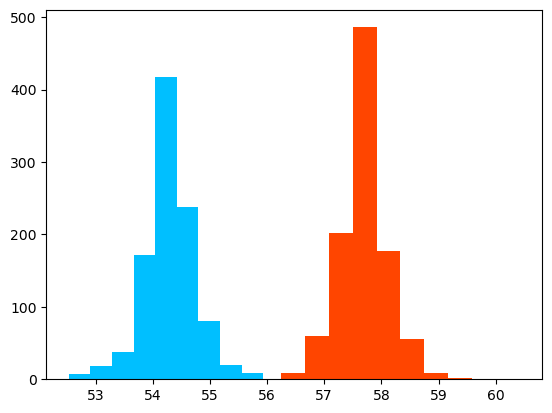

In [113]:
import numpy.random as np
import numpy as npp
menArr = []
womenArr = []

for i in range(100):

    deltaWomen = maxFemaleAge / people
    scaleWomen = deltaWomen / 0.1
    lapWomen = np.laplace(0, scaleWomen)

    womenArr.append(womenavg+lapWomen)

    delta = maxMaleage / people
    scale = delta / 0.1
    lap = np.laplace(0, scale)

    menArr.append(menavg+lap)


plt.hist(menArr, color="deepskyblue")
plt.hist(womenArr, color="orangered")
plt.show()
